Specially we will be walking through
1. Getting the Data - In this case we will be scraping the data from website
2. Cleaning the Data - we will walk through popular text pre-processing techinques
3. Organizing the Data - we will organize the cleaned Data into a way that is easy to input to other algorithms

The Output of the Data cleaning process will be clean, organized data in two standard text formats.
1. Corpus - a collection of text
2. Document Term Matrix - word counts in matrix format

# Problem Statement

Our goal is to look at transcripts of various comedians and note their simlarties and difference. Specially I would like to know if Ali Wong's comedy style is different than other commedians, since she is the commedian that got me interested in stand up comedy

# Getting the Data

There are wonderful people online that keep track of stand up routine transcripts. https://scrapsfromtheloft.com/

To decide which comedians to look into. I went on IMDB and looked specifically at comedy specials that were released in the past 5 years. To narrow  it down further, I looked only at those  with greater than 7.7/10 rating and more than  20000 votes.  If  a comedian had multiple specials that fit those requirements, I would pick the most highly rated one. I ended up with a dozen comedy specials

In [1]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle 

# Scraps transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns trnascript data specifically from scrapsfromtheloft.com'''
    page = requests.get(url).text
    soup = BeautifulSoup(page,'lxml')
    text = [p.text for p in soup.find(class_='post-content').find_all('p')]
    print(url)
    return text

# URLs of transcripts
urls = ['https://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'https://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'https://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'https://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'https://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'https://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'https://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'https://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']
# Comedian names
comedians = ['louis','dave','ricky','bo','bill','jim','john','hasan','ali','anthony','mike','joe']

In [2]:
# Request transcripts takes a few minutes to run
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
https://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
https://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
https://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
https://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
https://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
https://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
https://scrapsfromtheloft.com/2017/08/19/joe-roga

In [14]:
# Pickle files for later use
# make a directory to keep the text files

# for i,c in enumerate(comedians):
#    with open('transcripts/' + c + ".txt","wb") as file:
#        pickle.dump(transcripts[i],file)

In [3]:
# Load pickled files

data = {}
for i,c in enumerate(comedians):
    with open('transcripts/' + c + ".txt","rb") as file:
        data[c] = pickle.load(file)


In [4]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [5]:
# More checks
data['louis'][:1]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.']

# Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers etc. 
With text data, there are some common data cleaning techinques, which are also known as text pre-processing techinques.

With text data, this cleaning process can go on foreever. There is always an exception to every cleaning step. So we are going to follow the MVP(minimum value product) approach. Here are bunch of things you can do to clean your data. We are going to execute just the common cleaning steps here and the rest can be done at later point to improve our results.

Common data cleaning steps on all text:
    . Make text all lower case
    . Remove punctuation
    . Remove numerical values
    . Remove common non sensical text
    . Tokenize text
    . Remove stop words

More data cleaning steps after tokenization:
    . Stemming/lemmatization
    . Parts of speech tagging
    . Create bi-grams or tri-grams
    . Deal with typos
    . And more....

In [6]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [7]:
# Notice that our dictionary is currently in key:comedian,value:list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [8]:
# Since our text data is in paragraph, we are going tho cobine the data to single text for each comedian
def combine_text(list_of_text):
    '''Takes a list of text and combine them into one large chunk of text'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [9]:
data_combined = {key:[combine_text(value)] for (key, value) in data.items()}

In [10]:
# We can either keep it in dictionary format or put it into a pandas dataframe

import pandas as pd
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df


,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [11]:
# Lets take a look at traanscriipt for Ali wong
data_df.loc[['ali']][['transcript']]

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."


In [12]:
data_df.to_pickle('data_df.pkl')

In [13]:
# Apply a first round of text cleaning techinque
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words.'''
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

round1 = lambda x:clean_text_round1(x)

In [14]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [15]:
# Apply second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed in first round'''
    text = re.sub('[’“”,]','',text)
    text = re.sub('\n','',text)
    return text

round2 = lambda x: clean_text_round2(x)

In [16]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


# Organizing The Data

As mentioned earlier that the output of this notebook will be clean and organized data in two text formats.
1. Corpus - A collection of text
2. Document-Term Matrix - word counts in matrix format


### Corpus

we already created a corpus in an earlier step. The defination of corpus is a collection of texts and they are all put together neatly in a pandas dataframe here.


In [17]:
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnhm','Dave Chappelle','Hasan Minhaj','Jim Jefferies',
              'Joe-Rogan','John Mulaney','Louis-C.K.','Mike Birbiglia','Ricky Gervais']

In [18]:
data_df['full_name'] = full_names

In [19]:
# Let's pickle it for later use
data_df.to_pickle('corpus.pkl')

### Document-Term Matrix

For many of the techinques we will be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization techinque is to break down text into words. we can do this using scikit-learn's COunterVectorizer, where every row will represent a different document and every column will be represnt a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a','the,etc

In [20]:
# We are going to create a document-term matrix using CountVectorizor and exclude common English stop words.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(),columns = cv.get_feature_names() )
data_dtm.index = data_clean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [21]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle("data_clean.pkl")

#### Additional Exercises

1. Can you add an additional regular expression to the clean_text_round2  function to further clean the text?
2. Play around CountVectorizor's parameters. what is ngram_range? What is min_df and max_df?

# Exploratory Analysis

Below are some ways you can think of to explore our data set.

Top words: Find the most common words for each comedian .(Create word clouds)
Vocabulary: Take a look at unique number of words used
Amount of profanity: Most common terms

In [22]:
import pandas as pd
import pickle as pkl
data = pd.read_pickle('dtm.pkl')
data = data.transpose() # we did transpose since it will be easy to do aggregation for on each comedian
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index,top.values))

#top_dict



In [24]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word,count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, say, day, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, know, went, just, youre, people, thats, day, oh, going
---
joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, theres, cause
---
mike
like, im, know, said, just, dont, thats, thi

Note: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list. So let's do just that

In [25]:
# Look at the most common top words --> Add them to the stop word list
from collections import Counter

#Let's first pull out the top 30 words for each comedian

words = []
for comedian in data.columns:
    top = [word for (word,count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'god',
 'hes',
 'need',
 'tell',
 'yeah',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'say',
 'day',
 'just',
 'guys',
 'people',
 'youre',
 'tell',
 'grandma',
 'right',
 'think',
 'thing',
 'time',
 'did',
 'good',
 'school',
 'jokes',
 'yeah',
 'baby',
 'okay',
 'ive',
 'gonna',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'theres',
 'let',
 'doing',
 'know',
 'like',
 'think',
 'love',
 'im',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'eye',
 'said',
 'fucking',
 'peop

In [26]:
# Let's aggregate this list and identify the most common words along 
# with how many routines they
Counter(words).most_common

<bound method Counter.most_common of Counter({'like': 12, 'im': 12, 'know': 12, 'just': 12, 'dont': 12, 'thats': 12, 'right': 12, 'people': 12, 'youre': 11, 'got': 10, 'gonna': 8, 'time': 8, 'think': 8, 'oh': 7, 'yeah': 7, 'said': 7, 'cause': 6, 'hes': 6, 'theyre': 6, 'say': 6, 'fucking': 6, 'fuck': 6, 'shit': 5, 'day': 5, 'thing': 5, 'good': 5, 'want': 5, 'didnt': 5, 'going': 5, 'theres': 5, 'really': 5, 'did': 4, 'dude': 3, 'guys': 3, 'ive': 3, 'little': 3, 'man': 3, 'life': 3, 'went': 3, 'ok': 2, 'lot': 2, 'gotta': 2, 'women': 2, 'tell': 2, 'joke': 2, 'school': 2, 'guy': 2, 'make': 2, 'come': 2, 'love': 2, 'dad': 2, 'mom': 2, 'hey': 2, 'white': 2, 'goes': 2, 'kids': 2, 'real': 2, 'old': 2, 'id': 2, 'wanna': 1, 'husband': 1, 'pregnant': 1, 'god': 1, 'need': 1, 'anthony': 1, 'grandma': 1, 'jokes': 1, 'baby': 1, 'okay': 1, 'let': 1, 'doing': 1, 'bo': 1, 'stuff': 1, 'repeat': 1, 'cos': 1, 'eye': 1, 'prolonged': 1, 'contact': 1, 'um': 1, 'sluts': 1, 'ahah': 1, 'black': 1, 'nigga': 1, 'ga

In [27]:
# If more than half of the comedians have it as top word, exclude it form the lsit
add_stop_words = [word for word,count in Counter(words).most_common() if count >6]
add_stop_words


['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think',
 'oh',
 'yeah',
 'said']

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

In [29]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [30]:
#Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(),columns = cv.get_feature_names() )
data_stop.index = data_clean.index
data_stop


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [31]:
# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_dtop.pkl",'wb'))
data_stop.to_pickle("dtm_stop.pkl")

In [32]:
# let's make some word coluds:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

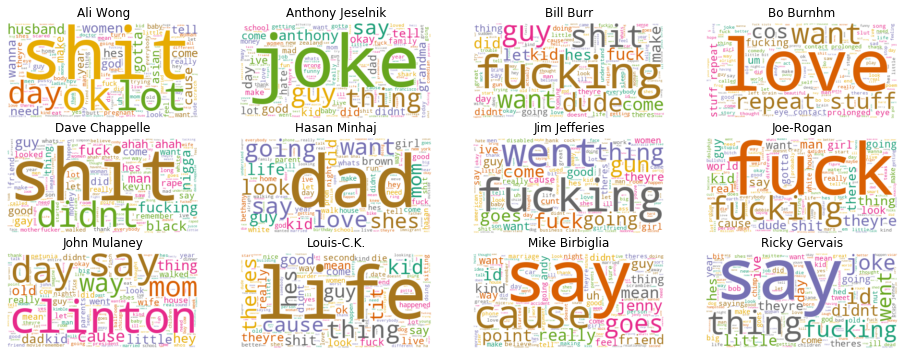

In [36]:
# Reset the output dimension
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,6]
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnhm','Dave Chappelle','Hasan Minhaj','Jim Jefferies',
              'Joe-Rogan','John Mulaney','Louis-C.K.','Mike Birbiglia','Ricky Gervais']

#Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3,4,index+1)
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])


### Findings
Ali Wong says the word a lot and talks about her husband.

A lot of people says teh F-word. Let's dis into that later.


## Number of Words

In [33]:
# Find the number of unique word that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that he word occure at least
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)),columns=['comedian','unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis-C.K.,1098
3,Bo Burnhm,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1389
4,Dave Chappelle,1403
7,Joe-Rogan,1435
10,Mike Birbiglia,1493
5,Hasan Minhaj,1558


In [34]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who tlaks slowest and fastest

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnhm,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis-C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1403,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1493,4740,76,62.368421
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1389,4001,62,64.532258
5,Hasan Minhaj,1558,4776,73,65.424658


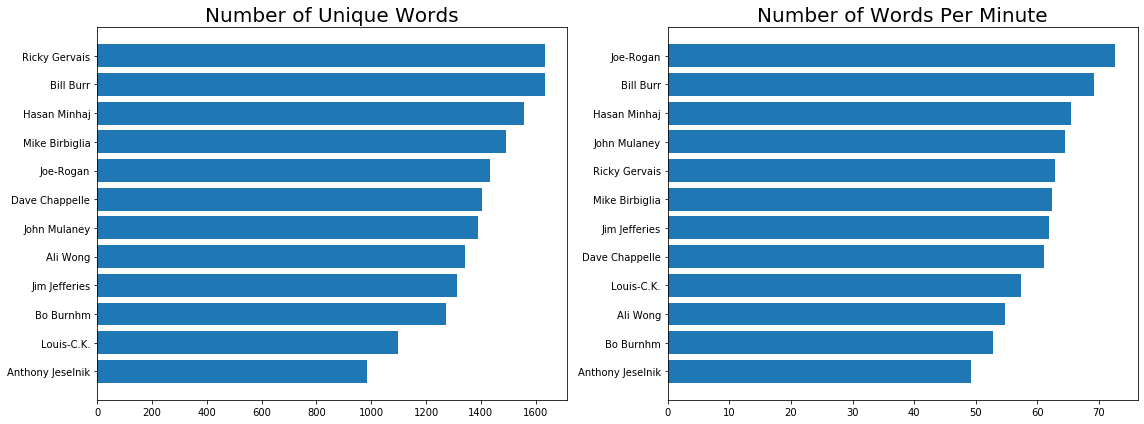

In [37]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort.unique_words, align = 'center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1,2,2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align = 'center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Amount of Profanity 

#### Analysis

In [38]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('baby', 1),
 ('okay', 1),
 ('l

In [39]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking','fuck','shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit],axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


Text(0, 0.5, 'Number of S Words')

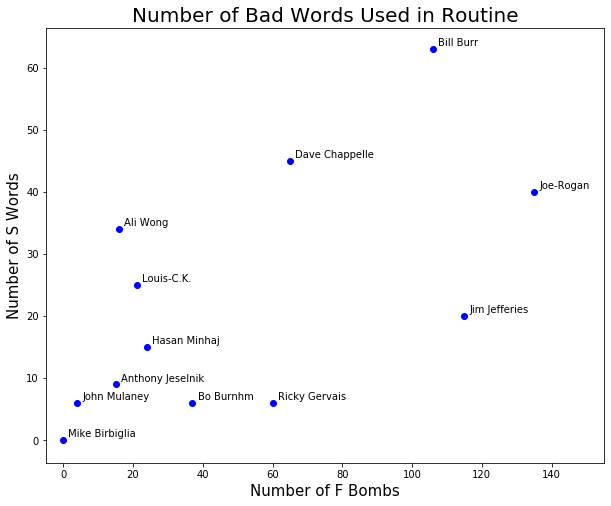

In [40]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10,8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    
    plt.scatter(x,y,color = 'blue')
    plt.text(x+1.5,y+0.5, full_names[i], fontsize = 10)
    plt.xlim(-5,155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

#### Findings:

##### Average 2 F-Bombs Per Minute - 
I don't like too much swearing, especially the f-word, which is probably why i have never heard of Bill Bur, Joe Rogan and Jim Jefferies

##### Clean Humor -  
It looks like profanity might be good predictor of the type of comedy i like, Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia


## NLP Techniques

#### Input: 
Clean data, plus we have verified that the data makes sense

#### NLP Techinques: 
Advanced analysis techinques, in this case they are specifically designed for text data

#### Output: 
Additional insights about our data to help us answer our questions "how is Ali Wong different"?

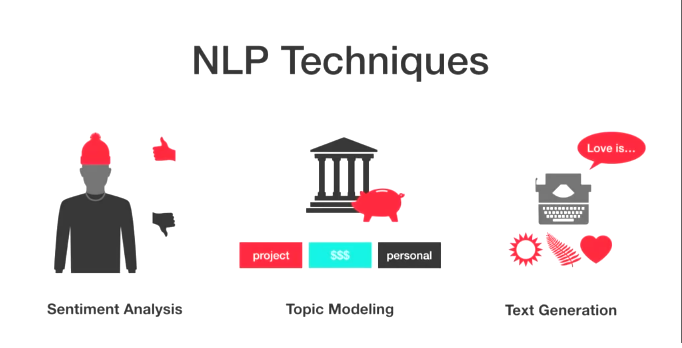

## Sentiment Analysis

#### Input:
A corpus. The reason we are not using document- term matrix here is beacuse order matters. "great" = positive. "not great" = negative.
#### TextBlob:
TextBlob is a Python library that is built on top of nltk. it is easier to use and provides some additional functionality, such as rules-based sentiment scores.
#### Output:
For each comedian, we will give them a sentiment score (how positive / negative are they) and subjectivity score (how opinionated are they).


### TextBlob Sentiment 

In [45]:
# The code for TextBlob's sentiment analysis

from textblob import TextBlob
TextBlob('I love you').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

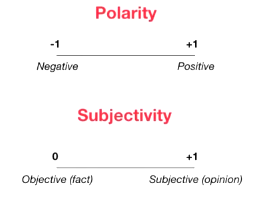

Lets uderstand what's going on behind the scene for TextBlob

He has gone through all words of english language and manually labeled thm positive sentiment, negative sentiment.

You might have heard about wordnet. This is kind of database crated by group researcher that say these are words are similar to each other.

TextBlob uses siliar kind of conecpt that was done by "Tom De Smedt" who manually labeled english words and its sentment score.

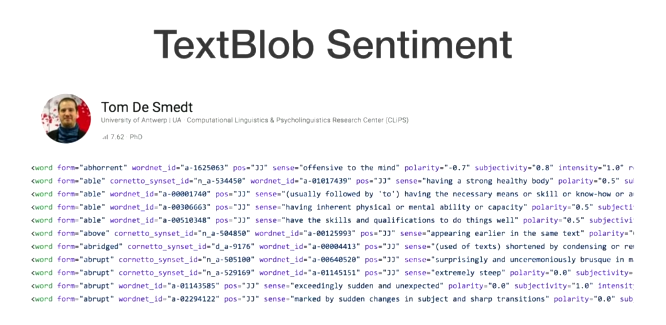



#### Let's take the word "great"

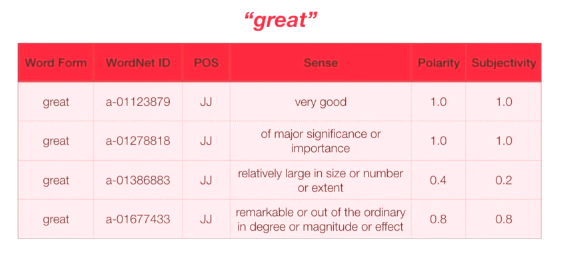

In [46]:
# How TextBlob solve the word "great"
# It takes average of Polarity and Subjectivity
TextBlob("great").sentiment
# 3.2/4 = 0.8 , 3/4 =0.75

Sentiment(polarity=0.8, subjectivity=0.75)

In [47]:
TextBlob(" not great").sentiment
# As per the documnet when ther is not beforw a word. it multiplies
# -0.5 . 0.8 *(-0.5) = -0.4

Sentiment(polarity=-0.4, subjectivity=0.75)

Note- This is called rule based appraoch in sentiment analysis

In [49]:
TextBlob("very great").sentiment
# It multiples subjectivity * 1.3 and polarity =1 

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)

### How TextBlob works?
TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to and averages all of them together

Output: Each comedian is assigned one polarity and one subjectivity score

While not the most sophisticated techinque, it is good starting point

This rules-based implementation is a knowledge-based techinque. There are also statistical methods out there such as Naive Bayes.

## Sentiment Analysis

So far, all of the analysis we have done has been pretty generic- looking at counts, creating scatter plots etc. These techinques could be applied to numeric data as well.

When it comes to text data, there are few popular techinques that we will be going through next starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. TextBlob Module: Linguistic researchers have labeled the sentiment of   words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity ( there are more labels as well, but we are going to ignore them now). A corpus sentiment is the average of this.
        . Polarity: How positive or negative is. -1 is very negative and +1 is very positive
        .Subjectivity: How subjective or opinionated a word is. 0 is fact, +1 is very much an opinion.


Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

### Sentiment of Routine

In [41]:
# We will start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnhm
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe-Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis-C.K.


In [42]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnhm,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe-Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis-C.K.,0.056665,0.515796


Text(0, 0.5, '<-- Fact -------- Opinions -->')

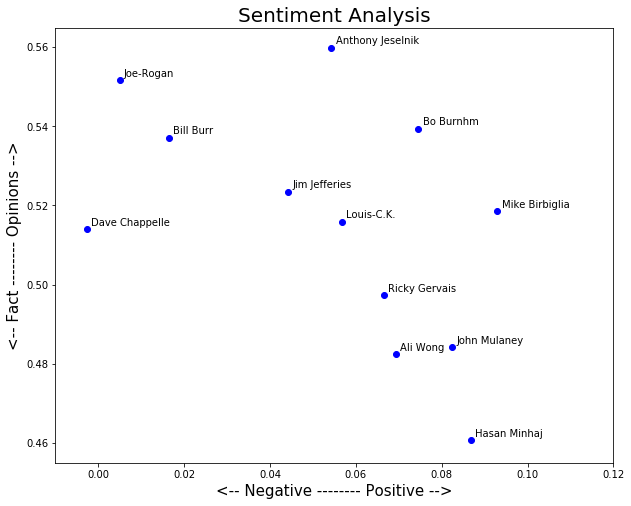

In [47]:
# Let's plot the result
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[10,8]

for index,comedian in enumerate(data.index):
    x = data.loc[comedian]['polarity']
    y = data.loc[comedian]['subjectivity']
    plt.scatter(x,y,color='blue')
    plt.text(x+.001,y+.001, data.loc[comedian]['full_name'],fontsize=10)
    plt.xlim(-.01,.12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Fact -------- Opinions -->', fontsize=15)

### Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there is anything interesting about the sentiment over time throughout each routine

In [61]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equals parts, with a default of 10 equal parts'''
    
    # Calulate length of text, the size of each chunk of text and the starting points of each
    
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0,length,size)
    
    # Pull out equally sized piece of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's Create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)


In [68]:
# The list has 12 elements. One for each transcript
len(list_pieces)

12

In [69]:
# Each transcript has splitted into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

#polarity_transcript   

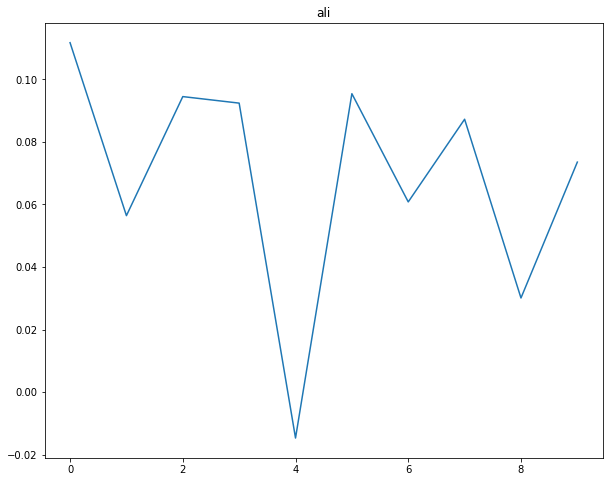

In [72]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

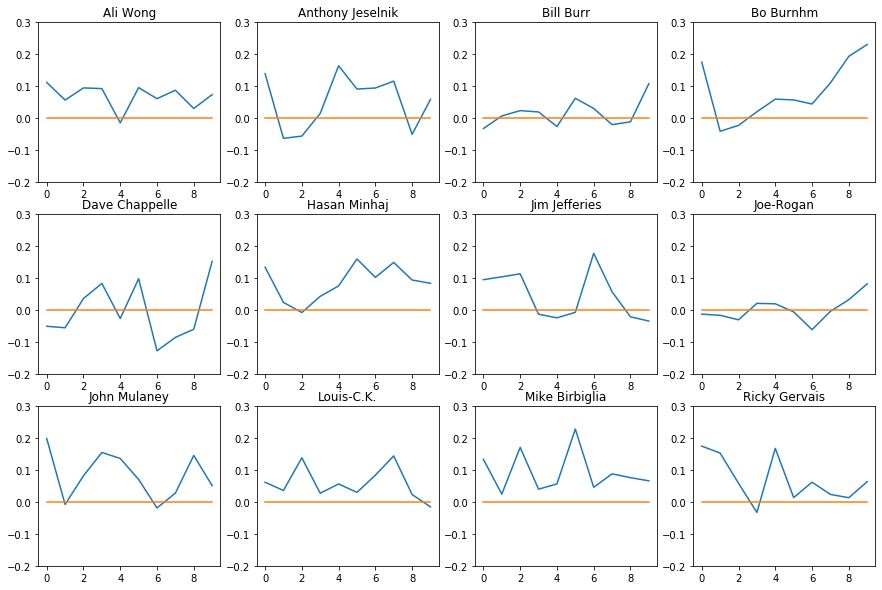

In [75]:
# Show the plot for all comedians
plt.rcParams['figure.figsize']=[15,10]

for index,comedian in enumerate(data.index):
    plt.subplot(3,4,index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10),np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2,ymax=.3)

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbigla.

On the other hand, you have some pretty different patterns here like Bo Bumham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine

## Topic Modeling

Input: A document-term matrix. 
        Each topic will consist of set of words where order does not matter, 
        So we are going to start with the bag of words format

gensim: gensim is a python toolkit built by Radim Rehurek specifically for topic modeling.
        We are going to a popular topic modeling techinque called Latent Dirichlet Allocation (LDA).
        We are also going to use NLTK for some part of speech tagging
        
Output: Our goal is to find themes across various comedy routines, and see which comedians tend to talk about which themes

#### Latent Dirichlet Allocation

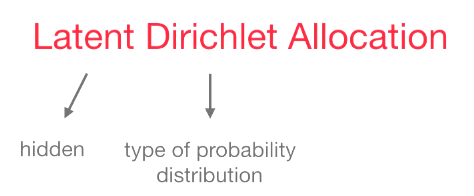

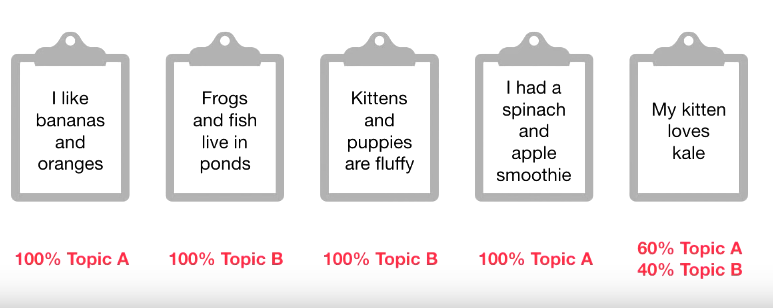

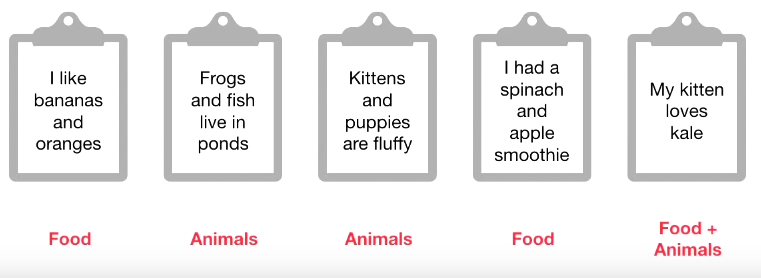

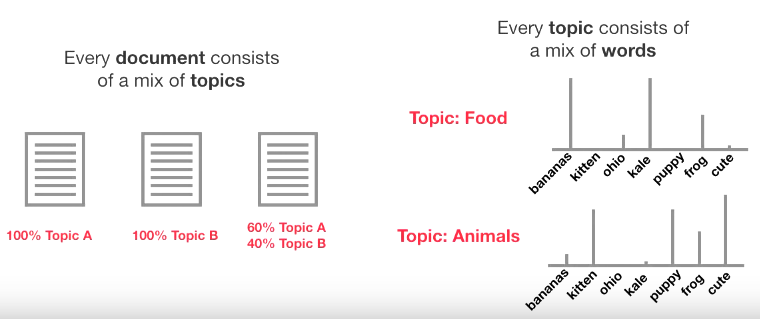

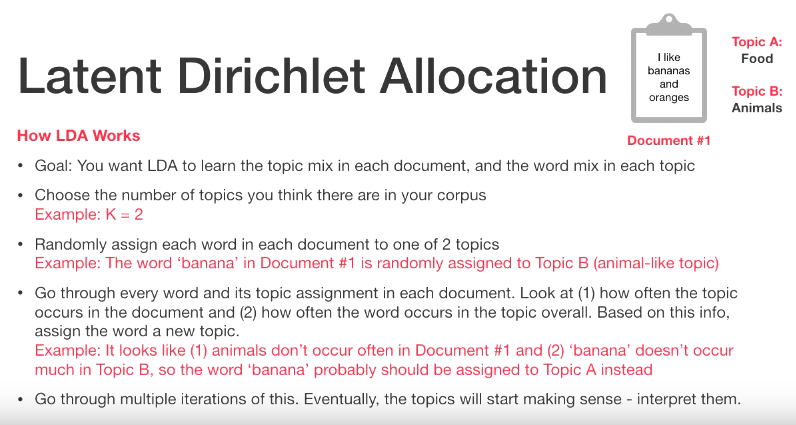

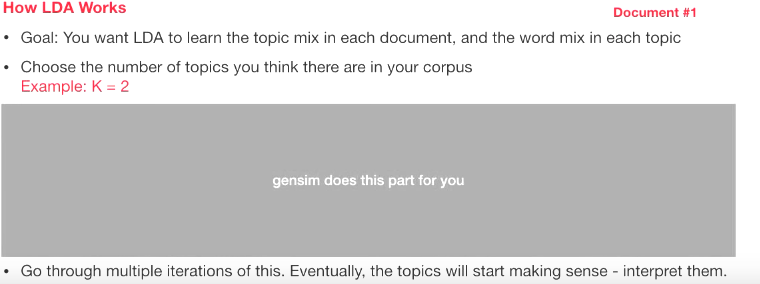

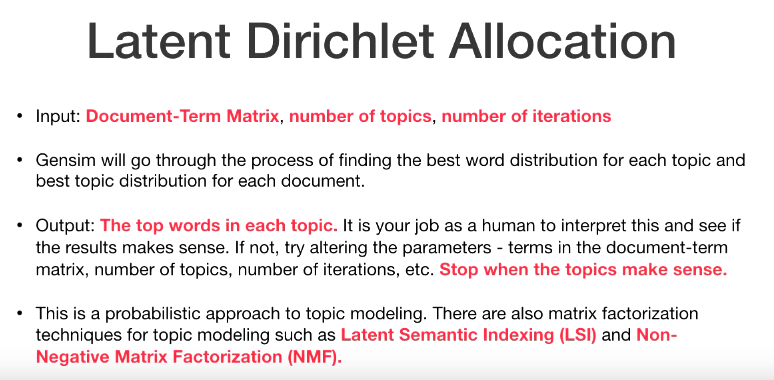

### Topic Modeling - Attempt 1 (All Text)

In [2]:
# Let's read in our document-term matrix

import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [3]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim

from gensim import matutils, models
import scipy.sparse


In [4]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm


,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# We are going to put the term-document matrix into a new gensim format, from df ->>sparse matrix
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [6]:
# Gensim also requires dictionary of the all terms and their respective location in the term document matrix
cv = pickle.load(open("cv_dtop.pkl","rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. 

Let's start the number of topics at 2, see if the results make sense and increase the number from here

In [7]:
# Now thatwe have the corpus (term-document matrix) and id2word (dictionary of location: term)
# We need to specify two other parameters as well - the number of topics and the number of passes

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.004*"cause" + 0.004*"shit" + 0.004*"day" + 0.004*"little" + 0.003*"clinton" + 0.003*"hey" + 0.003*"lot" + 0.003*"mom" + 0.003*"really" + 0.003*"wanna"'),
 (1,
  '0.009*"fucking" + 0.006*"fuck" + 0.006*"shit" + 0.006*"say" + 0.005*"going" + 0.005*"theyre" + 0.005*"want" + 0.005*"didnt" + 0.005*"hes" + 0.005*"good"')]

In [8]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()


[(0,
  '0.007*"went" + 0.006*"cause" + 0.006*"fucking" + 0.005*"goes" + 0.005*"day" + 0.005*"really" + 0.005*"going" + 0.005*"say" + 0.004*"thing" + 0.004*"says"'),
 (1,
  '0.009*"fucking" + 0.007*"fuck" + 0.006*"shit" + 0.006*"theyre" + 0.005*"hes" + 0.005*"say" + 0.005*"didnt" + 0.005*"theres" + 0.005*"man" + 0.005*"good"'),
 (2,
  '0.008*"shit" + 0.006*"want" + 0.006*"fucking" + 0.005*"going" + 0.005*"say" + 0.005*"dad" + 0.005*"did" + 0.005*"day" + 0.005*"guys" + 0.005*"fuck"')]

In [9]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()


[(0,
  '0.011*"fucking" + 0.008*"shit" + 0.006*"dude" + 0.005*"want" + 0.004*"fuck" + 0.004*"did" + 0.004*"guy" + 0.004*"make" + 0.004*"let" + 0.004*"going"'),
 (1,
  '0.006*"day" + 0.005*"say" + 0.005*"shit" + 0.005*"cause" + 0.004*"little" + 0.004*"lot" + 0.004*"mom" + 0.004*"did" + 0.004*"really" + 0.004*"tell"'),
 (2,
  '0.009*"fucking" + 0.007*"going" + 0.006*"say" + 0.006*"fuck" + 0.006*"theyre" + 0.006*"went" + 0.005*"want" + 0.005*"theres" + 0.005*"goes" + 0.004*"day"'),
 (3,
  '0.008*"shit" + 0.006*"fuck" + 0.006*"fucking" + 0.006*"hes" + 0.006*"good" + 0.006*"didnt" + 0.006*"man" + 0.006*"life" + 0.005*"love" + 0.005*"want"')]

These topics aren't looking too great, We have tries modifying our parameters. Let's try modifying our terms list as well

### Topic Modeling - Attempt 2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjective, etc.). 

In [10]:
# Let's create a function to pull out nouns from a string of text.

from nltk import word_tokenize,pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [11]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,all right petunia wish me luck out there you w...
louis,introfade the music out lets roll hold there l...


In [12]:
# Apply the nouns function to the transcripts to filter only onnouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladies gentlemen stage ali hi thank hello na s...
anthony,thank thank people i em i francisco city world...
bill,thank thank pleasure georgia area oasis i june...
bo,macdonald farm e i o farm pig e i i snort macd...
dave,jokes living stare work profound train thought...
hasan,whats davis whats home i netflix la york i son...
jim,ladies gentlemen stage mr jim jefferies thank ...
joe,ladies gentlemen joe fuck thanks phone fuckfac...
john,petunia thats hello hello chicago thank crowd ...
louis,music lets lights lights thank i i place place...


In [16]:
# Create a new document-term matrix using only columns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like','im','know','just','dont','thats','right'
                 ,'people','youre','got','gonna','time','think','yeah','said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns = cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,...,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v,k) for k, v in cvn.vocabulary_.items())


In [20]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"shit" + 0.008*"man" + 0.008*"fuck" + 0.008*"day" + 0.007*"life" + 0.007*"thing" + 0.007*"hes" + 0.006*"cause" + 0.006*"guy" + 0.006*"gon"'),
 (1,
  '0.009*"thing" + 0.008*"day" + 0.007*"way" + 0.007*"cause" + 0.007*"life" + 0.007*"hes" + 0.006*"things" + 0.005*"man" + 0.005*"shit" + 0.005*"lot"')]

In [21]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"shit" + 0.010*"day" + 0.009*"thing" + 0.009*"life" + 0.009*"man" + 0.008*"fuck" + 0.008*"cause" + 0.007*"hes" + 0.007*"guy" + 0.007*"lot"'),
 (1,
  '0.007*"id" + 0.007*"thing" + 0.006*"day" + 0.006*"hes" + 0.006*"way" + 0.005*"years" + 0.005*"point" + 0.005*"things" + 0.005*"joke" + 0.005*"cause"'),
 (2,
  '0.000*"shit" + 0.000*"man" + 0.000*"day" + 0.000*"life" + 0.000*"lot" + 0.000*"way" + 0.000*"hes" + 0.000*"thing" + 0.000*"fuck" + 0.000*"gon"')]

In [22]:
# Let's start with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.000*"hes" + 0.000*"gon" + 0.000*"shit" + 0.000*"day" + 0.000*"life" + 0.000*"years" + 0.000*"way" + 0.000*"theyre" + 0.000*"thing" + 0.000*"guy"'),
 (1,
  '0.011*"day" + 0.010*"thing" + 0.009*"shit" + 0.008*"man" + 0.007*"life" + 0.007*"fuck" + 0.007*"hes" + 0.007*"cause" + 0.007*"way" + 0.006*"dad"'),
 (2,
  '0.009*"cause" + 0.009*"point" + 0.008*"kind" + 0.006*"way" + 0.006*"id" + 0.006*"jenny" + 0.006*"night" + 0.006*"car" + 0.005*"gon" + 0.005*"guy"'),
 (3,
  '0.010*"man" + 0.010*"life" + 0.010*"shit" + 0.009*"hes" + 0.008*"thing" + 0.007*"way" + 0.006*"lot" + 0.006*"fuck" + 0.006*"guy" + 0.006*"women"')]

### Topic Modeling - Attempt 3 (Nouns and Adjective)


In [23]:
# Let's create a function to pull out nouns from a string of text

def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2]=='JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [24]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi wel...
anthony,thank san francisco thank good people surprise...
bill,right thank thank pleasure greater atlanta geo...
bo,old macdonald farm e i i o farm pig e i i snor...
dave,dirty jokes living stare most hard work profou...
hasan,whats davis whats im home i netflix special la...
jim,ladies gentlemen welcome stage mr jim jefferie...
joe,ladies gentlemen joe fuck san francisco thanks...
john,right petunia august thats good right hello he...
louis,music lets lights lights thank much i i i nice...


In [25]:
# Create a new document-term matrix using only nouns and adjectives

cvna = CountVectorizer(stop_words=stop_words,max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(),columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,ablebodied,...,yyou,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,2,0,...,1,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Create the gensim Corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
# Create the vocabulary dictionary
id2wordna = dict((v,k) for k,v in cvna.vocabulary_.items())

In [27]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"mom" + 0.003*"door" + 0.003*"joke" + 0.003*"parents" + 0.003*"son" + 0.003*"ass" + 0.003*"gun" + 0.002*"friend" + 0.002*"class" + 0.002*"mad"'),
 (1,
  '0.004*"joke" + 0.004*"bo" + 0.003*"clinton" + 0.003*"repeat" + 0.003*"eye" + 0.003*"mom" + 0.003*"dog" + 0.003*"parents" + 0.003*"ha" + 0.003*"nuts"')]

In [28]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"cause" + 0.009*"shit" + 0.008*"day" + 0.007*"gon" + 0.007*"way" + 0.007*"thing" + 0.007*"guy" + 0.006*"kind" + 0.006*"hes" + 0.005*"lot"'),
 (1,
  '0.013*"thing" + 0.012*"day" + 0.010*"life" + 0.008*"cause" + 0.008*"things" + 0.007*"fuck" + 0.007*"hes" + 0.007*"joke" + 0.007*"man" + 0.007*"kids"'),
 (2,
  '0.010*"man" + 0.009*"shit" + 0.008*"dad" + 0.007*"fuck" + 0.006*"hes" + 0.006*"life" + 0.006*"way" + 0.005*"night" + 0.005*"shes" + 0.005*"lot"')]

In [29]:
# Let's start with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.015*"dad" + 0.008*"life" + 0.008*"shes" + 0.007*"mom" + 0.006*"school" + 0.006*"parents" + 0.006*"girl" + 0.006*"home" + 0.005*"hes" + 0.005*"night"'),
 (1,
  '0.013*"thing" + 0.012*"life" + 0.011*"cause" + 0.011*"fuck" + 0.010*"day" + 0.009*"man" + 0.008*"shit" + 0.008*"guy" + 0.008*"hes" + 0.008*"kids"'),
 (2,
  '0.009*"cause" + 0.009*"guy" + 0.009*"gon" + 0.008*"shit" + 0.008*"thing" + 0.007*"kind" + 0.007*"hes" + 0.006*"way" + 0.006*"point" + 0.006*"day"'),
 (3,
  '0.010*"day" + 0.008*"man" + 0.008*"shit" + 0.008*"thing" + 0.007*"way" + 0.007*"lot" + 0.007*"joke" + 0.007*"hes" + 0.006*"years" + 0.006*"things"')]

### Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns ad adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine tuned topics

In [32]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.008*"mom" + 0.008*"joke" + 0.007*"clinton" + 0.006*"anthony" + 0.005*"cow" + 0.005*"parents" + 0.005*"wife" + 0.005*"grandma" + 0.004*"mad" + 0.004*"friend"'),
 (1,
  '0.004*"joke" + 0.003*"dog" + 0.003*"bo" + 0.003*"gun" + 0.003*"ass" + 0.003*"jenny" + 0.003*"guns" + 0.003*"hell" + 0.003*"class" + 0.003*"repeat"'),
 (2,
  '0.005*"husband" + 0.004*"ok" + 0.004*"mom" + 0.004*"pregnant" + 0.004*"ass" + 0.003*"stupid" + 0.003*"dick" + 0.003*"wan" + 0.003*"fingers" + 0.003*"asian"'),
 (3,
  '0.006*"hasan" + 0.006*"ahah" + 0.005*"mom" + 0.004*"parents" + 0.004*"nigga" + 0.004*"gay" + 0.004*"door" + 0.004*"son" + 0.004*"brown" + 0.003*"bike"')]

These four topics look pretty decent. Let's settle on these for now

. Topic 0: profanity
. Topic 1: guns 
. Topic 2: husband, wife
. Topic 3: mom, parents

In [34]:
# Let's take a look at which topics each transcript contain
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'ali'),
 (0, 'anthony'),
 (1, 'bill'),
 (1, 'bo'),
 (3, 'dave'),
 (3, 'hasan'),
 (1, 'jim'),
 (2, 'joe'),
 (0, 'john'),
 (1, 'louis'),
 (1, 'mike'),
 (1, 'ricky')]

For a first pass of LDA, these kind of make sense to me, so we will call it a day for now.

. Topic 0: mom, parents (Anthony, Hasan, Louis, Ricky)
. Topic 1: husband, wife
. Topic 2: guns
. Topic 3: profanity


## Text Generation 

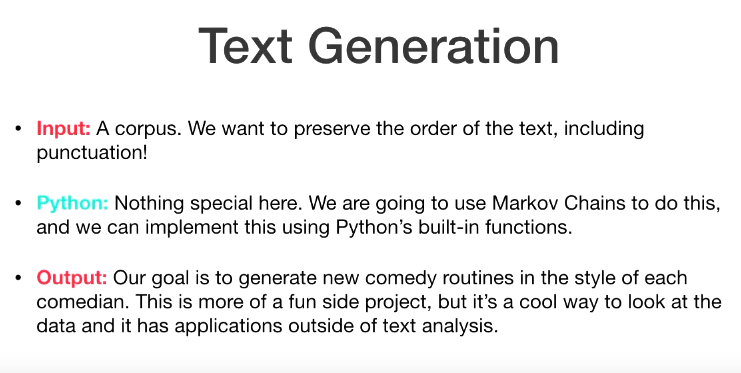

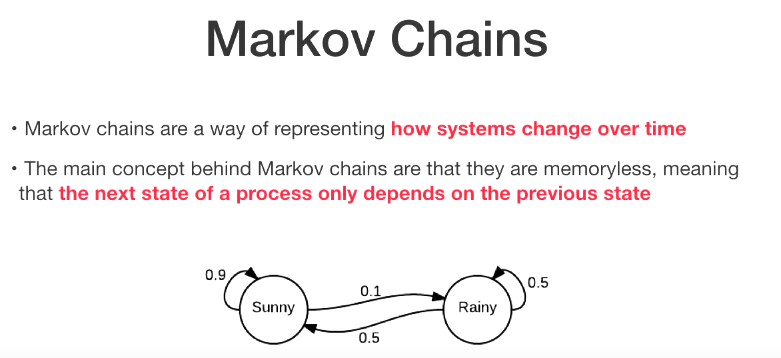

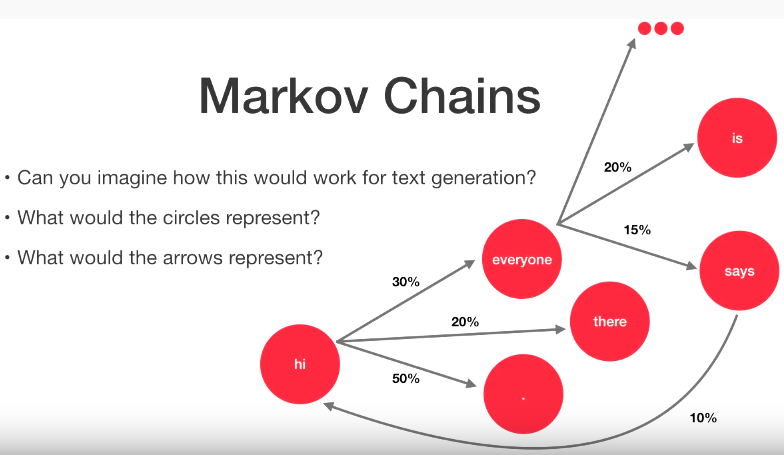

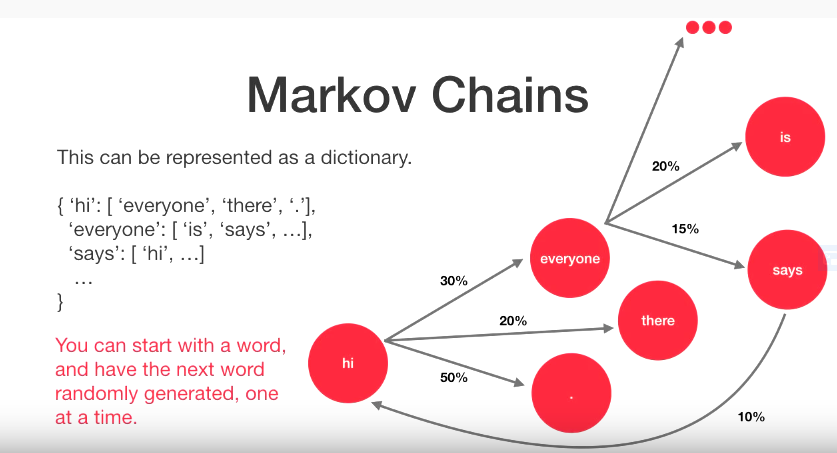

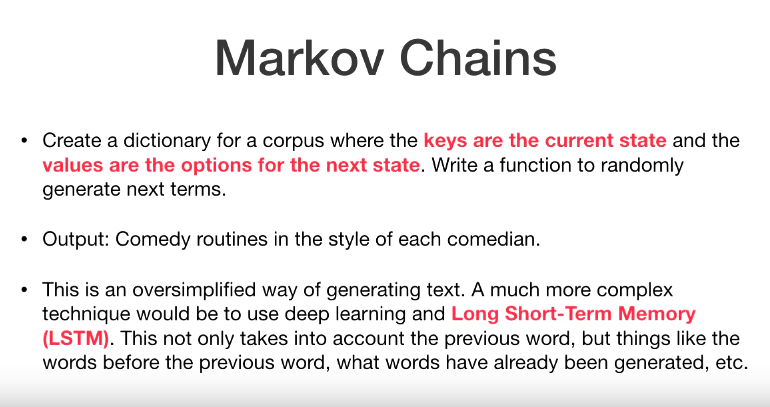

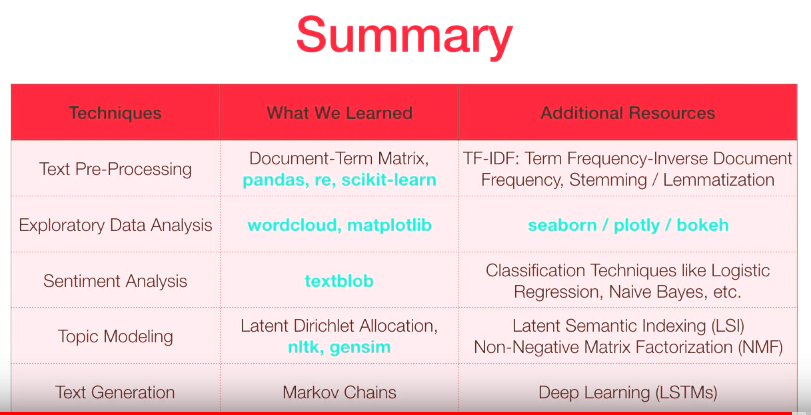

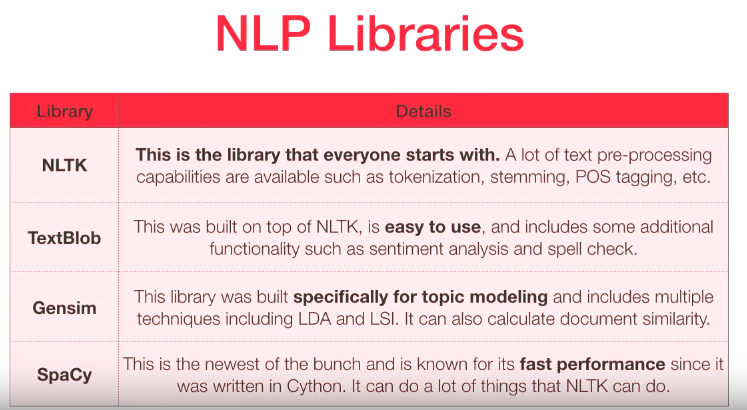